In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

# Load a dataset from a CSV file
tortilla_prices_path = (r'C:\Users\ashle\Tortillas-Project\tortilla_prices.csv')

In [123]:
tortilla_df = pd.read_csv(tortilla_prices_path)

In [124]:
# Check for missing values
print(tortilla_df.isnull().sum())

State                    0
City                     0
Year                     0
Month                    0
Day                      0
Store type               0
Price per kilogram    6390
dtype: int64


In [125]:
tortilla_df.count()

State                 284394
City                  284394
Year                  284394
Month                 284394
Day                   284394
Store type            284394
Price per kilogram    278004
dtype: int64

In [126]:
# Drop missing values
tortilla_df = tortilla_df.dropna(how='any')

In [127]:
tortilla_df.count()

State                 278004
City                  278004
Year                  278004
Month                 278004
Day                   278004
Store type            278004
Price per kilogram    278004
dtype: int64

In [128]:
tortilla_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278004 entries, 0 to 284393
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               278004 non-null  object 
 1   City                278004 non-null  object 
 2   Year                278004 non-null  int64  
 3   Month               278004 non-null  int64  
 4   Day                 278004 non-null  int64  
 5   Store type          278004 non-null  object 
 6   Price per kilogram  278004 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 17.0+ MB


In [129]:
tortilla_df=tortilla_df[~tortilla_df["Year"].isna()]

In [130]:
tortilla_df[["Year","Month","Day"]]=tortilla_df[["Year","Month","Day"]].astype(int)

In [131]:
# Create a new 'date' column with the concatenated date 

tortilla_df['Date'] = tortilla_df['Month'].astype(str).str.zfill(2) + '/' + tortilla_df['Day'].astype(str).str.zfill(2) + '/' + tortilla_df['Year'].astype(str)

In [132]:
tortilla_df.head()

,State,City,Year,Month,Day,Store type,Price per kilogram,Date
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.9,01/10/2007
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.0,01/10/2007
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.0,01/10/2007
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.0,01/10/2007
5,Coahuila,Piedras Negras,2007,1,10,Mom and Pop Store,10.0,01/10/2007


In [133]:
tortilla_df["Date"]=pd.to_datetime(tortilla_df["Date"])

In [134]:
tortilla_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278004 entries, 0 to 284393
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   State               278004 non-null  object        
 1   City                278004 non-null  object        
 2   Year                278004 non-null  int32         
 3   Month               278004 non-null  int32         
 4   Day                 278004 non-null  int32         
 5   Store type          278004 non-null  object        
 6   Price per kilogram  278004 non-null  float64       
 7   Date                278004 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(3), object(3)
memory usage: 15.9+ MB


## Comparison of Mom and Pop Stores vs. Big Retail Stores Over Time

In [135]:
df_cleaned = tortilla_df[(tortilla_df != 0).all(axis=1)]
df_cleaned

,State,City,Year,Month,Day,Store type,Price per kilogram,Date
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.90,2007-01-10
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.00,2007-01-10
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.00,2007-01-10
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.00,2007-01-10
5,Coahuila,Piedras Negras,2007,1,10,Mom and Pop Store,10.00,2007-01-10
...,...,...,...,...,...,...,...,...
284389,Veracruz,Coatzacoalcos,2024,7,8,Big Retail Store,12.50,2024-07-08
284390,Veracruz,Veracruz,2024,7,8,Big Retail Store,13.60,2024-07-08
284391,Veracruz,Xalapa,2024,7,8,Big Retail Store,14.33,2024-07-08
284392,Yucatán,Mérida,2024,7,8,Big Retail Store,13.40,2024-07-08


In [136]:
print(df_cleaned[df_cleaned['Year'] == 2007])

                     State            City  Year  Month  Day  \
0           Aguascalientes  Aguascalientes  2007      1   10   
2          Baja California         Tijuana  2007      1   10   
3      Baja California Sur          La Paz  2007      1   10   
4                 Campeche        Campeche  2007      1   10   
5                 Coahuila  Piedras Negras  2007      1   10   
...                    ...             ...   ...    ...  ...   
16372             Veracruz       Poza Rica  2007     12   31   
16373             Veracruz        Veracruz  2007     12   31   
16374             Veracruz          Xalapa  2007     12   31   
16375              Yucatán          Mérida  2007     12   31   
16376            Zacatecas       Zacatecas  2007     12   31   

              Store type  Price per kilogram       Date  
0      Mom and Pop Store                9.90 2007-01-10  
2      Mom and Pop Store               10.00 2007-01-10  
3      Mom and Pop Store               10.00 2007-01-10  

In [137]:
print(df_cleaned[df_cleaned['Year'] == 2023])

                      State            City  Year  Month  Day  \
260094       Aguascalientes  Aguascalientes  2023      1    2   
260095      Baja California        Mexicali  2023      1    2   
260096      Baja California         Tijuana  2023      1    2   
260097  Baja California Sur          La Paz  2023      1    2   
260098             Campeche        Campeche  2023      1    2   
...                     ...             ...   ...    ...  ...   
276181             Veracruz   Coatzacoalcos  2023     12   29   
276182             Veracruz        Veracruz  2023     12   29   
276183             Veracruz          Xalapa  2023     12   29   
276184              Yucatán          Mérida  2023     12   29   
276185            Zacatecas       Zacatecas  2023     12   29   

               Store type  Price per kilogram       Date  
260094  Mom and Pop Store               21.33 2023-01-02  
260095  Mom and Pop Store               29.14 2023-01-02  
260096  Mom and Pop Store               25

In [138]:
print(df_cleaned[df_cleaned['Store type'].isin(['Mom and Pop Store', 'Big Retail Store'])])

                      State            City  Year  Month  Day  \
0            Aguascalientes  Aguascalientes  2007      1   10   
2           Baja California         Tijuana  2007      1   10   
3       Baja California Sur          La Paz  2007      1   10   
4                  Campeche        Campeche  2007      1   10   
5                  Coahuila  Piedras Negras  2007      1   10   
...                     ...             ...   ...    ...  ...   
284389             Veracruz   Coatzacoalcos  2024      7    8   
284390             Veracruz        Veracruz  2024      7    8   
284391             Veracruz          Xalapa  2024      7    8   
284392              Yucatán          Mérida  2024      7    8   
284393            Zacatecas       Zacatecas  2024      7    8   

               Store type  Price per kilogram       Date  
0       Mom and Pop Store                9.90 2007-01-10  
2       Mom and Pop Store               10.00 2007-01-10  
3       Mom and Pop Store               10

In [139]:
# Filter by Store Types in 2007

filtered_df07 = df_cleaned[(df_cleaned['Store type'].isin(['Mom and Pop Store', 'Big Retail Store'])) & (df_cleaned['Year'] == 2007)]
filtered_df07

,State,City,Year,Month,Day,Store type,Price per kilogram,Date
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.90,2007-01-10
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.00,2007-01-10
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.00,2007-01-10
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.00,2007-01-10
5,Coahuila,Piedras Negras,2007,1,10,Mom and Pop Store,10.00,2007-01-10
...,...,...,...,...,...,...,...,...
16372,Veracruz,Poza Rica,2007,12,31,Big Retail Store,5.83,2007-12-31
16373,Veracruz,Veracruz,2007,12,31,Big Retail Store,5.80,2007-12-31
16374,Veracruz,Xalapa,2007,12,31,Big Retail Store,5.80,2007-12-31
16375,Yucatán,Mérida,2007,12,31,Big Retail Store,5.73,2007-12-31


In [140]:
# Display 2007 Store Type Counts

store_type_counts = filtered_df07['Store type'].value_counts()
store_type_counts

Store type
Mom and Pop Store    8287
Big Retail Store     7837
Name: count, dtype: int64

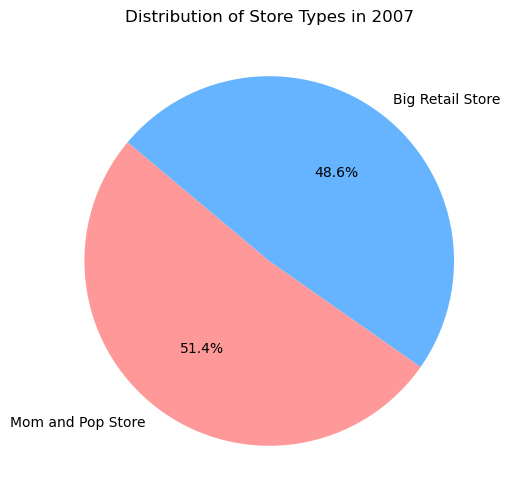

In [141]:
# Create the pie chart

plt.figure(figsize=(8, 6))
plt.pie(store_type_counts, 
        labels=store_type_counts.index, 
        autopct='%1.1f%%', 
        colors=['#ff9999', '#66b3ff'],
        startangle=140)
plt.title('Distribution of Store Types in 2007')
plt.show()

In [142]:
# Filter by Store Types in 2023

filtered_df23 = df_cleaned[(df_cleaned['Store type'].isin(['Mom and Pop Store', 'Big Retail Store'])) & (df_cleaned['Year'] == 2023)]
filtered_df23

,State,City,Year,Month,Day,Store type,Price per kilogram,Date
260094,Aguascalientes,Aguascalientes,2023,1,2,Mom and Pop Store,21.33,2023-01-02
260095,Baja California,Mexicali,2023,1,2,Mom and Pop Store,29.14,2023-01-02
260096,Baja California,Tijuana,2023,1,2,Mom and Pop Store,25.82,2023-01-02
260097,Baja California Sur,La Paz,2023,1,2,Mom and Pop Store,25.00,2023-01-02
260098,Campeche,Campeche,2023,1,2,Mom and Pop Store,23.50,2023-01-02
...,...,...,...,...,...,...,...,...
276181,Veracruz,Coatzacoalcos,2023,12,29,Big Retail Store,10.50,2023-12-29
276182,Veracruz,Veracruz,2023,12,29,Big Retail Store,13.50,2023-12-29
276183,Veracruz,Xalapa,2023,12,29,Big Retail Store,12.40,2023-12-29
276184,Yucatán,Mérida,2023,12,29,Big Retail Store,13.53,2023-12-29


In [143]:
# Display 2024 Store Type Counts

store_type_counts_23 = filtered_df23['Store type'].value_counts()
store_type_counts_23

Store type
Mom and Pop Store    7975
Big Retail Store     7975
Name: count, dtype: int64

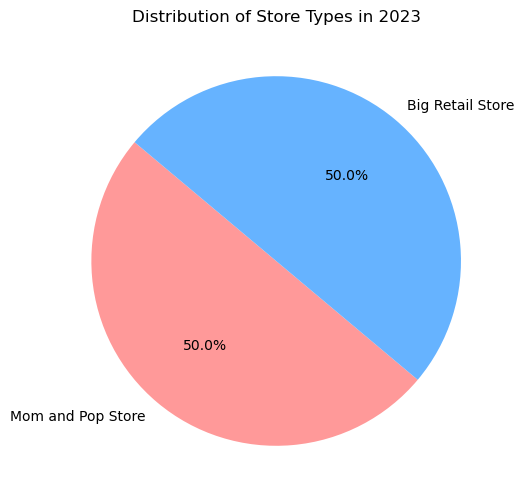

In [144]:
# Create the pie chart

plt.figure(figsize=(8, 6))
plt.pie(store_type_counts_23, 
        labels=store_type_counts.index, 
        autopct='%1.1f%%', 
        colors=['#ff9999', '#66b3ff'],
        startangle=140)
plt.title('Distribution of Store Types in 2023')
plt.show()